<a href="https://colab.research.google.com/github/collinsbett1/mchezopesa-football-analysis/blob/main/Mchezopesa_Football_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mchezopesa Football Analysis


## 1. Defining the Question.

### a) Specifying the Data Analytics Question.
> As a football analyst in Mchezopesa Ltd, I would like to know whether a team playing home or away or if the match is friendly or not affects the number of goals it scores.
> I would also like to know if those variables affect whether a team wins, losses or draws. 

### b) Defining the Metric for Success.
> The analysis will be declared a success when we'll be able to create a machine learning model that predicts the number of goals scored in a match given that a team is either playing home or away or if the match is friendly or not.


### c) Understanding the Context.
> You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

> A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

## 2. Reading the Data.

In [4]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


In [5]:
# reading our fifa results dataset
df = pd.read_csv('/content/results.csv')

## 3. Reading the Datasets.

In [6]:
# Previewing the head of the fifa results dataset
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
# Previewing the tail of the fifa results dataset
df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [8]:
# Determining the number of records in our dataset
df.shape

(40839, 9)

In [9]:
#Checking whether each column has an appropriate datatype
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [10]:
# Description of the numerical data
df.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [11]:
# Loading the fifa ranking dataset
ranking_df=pd.read_csv('/content/fifa_ranking.csv')

In [12]:
# Previewing the head of the dataset.
ranking_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [13]:
# Previewning the tail of the dataset.
ranking_df.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
13990,103,Wales,WAL,0.0,384.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2000-08-09
13991,104,Vietnam,VIE,0.0,393.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,2000-08-09
13992,105,Mozambique,MOZ,0.0,373.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2000-08-09
13993,106,Uganda,UGA,0.0,355.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2000-08-09
13994,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Determining the number of records in our dataset
ranking_df.shape

(13995, 16)

In [15]:
#Checking whether each column has an appropriate datatype
ranking_df.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points            float64
rank_change                float64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [16]:
# Description of the numerical data
ranking_df.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,13995.000000,13994.0,13994.000000,13994.000000,13994.0,13994.0,13994.0,13994.0,13994.0,13994.0,13994.0,13994.0
mean,94.364630,0.0,115.123339,-0.035015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,54.733547,0.0,183.991128,5.607973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.000000,-72.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,47.000000,0.0,13.000000,-2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,94.000000,0.0,35.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,141.000000,0.0,64.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,202.000000,0.0,842.000000,92.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Tidying the Dataset

### a) Tidying the FIFA Results dataset.

In [17]:
# drop the unnecessary columns
df.drop(['city', 'neutral'], axis = 1, inplace=True)

> The city, country and neutral columns serve no purpose in the making of our model.

In [18]:
# confirming the columns have been dropped
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country'],
      dtype='object')

In [19]:
# Checking for duplicates
df.duplicated().value_counts()

False    40838
True         1
dtype: int64

In [20]:
# Dropping the duplicates
df.drop_duplicates(keep= False, inplace=True)

In [21]:
# Checking if the duplicates have been dropped
df.duplicated().any()

False

In [22]:
# Checking for null values
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
country       0
dtype: int64

> The dataset does not have any null values.

In [23]:
#Spliting the date column into month and year then add them as columns

df.date = df.date.apply(lambda x: x.replace('/', '-'))

df.date = pd.to_datetime(df.date)

df['year'] = df.date.dt.year

df['month'] = df.date.dt.month

In [24]:
#We will remove all data before 1993 because ranking begins from 1993
df = df [df['date']>='1993']

In [25]:
#Checking the years in the results dataset

df.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [26]:
# Adding a new column that shows the status of the home team, whether they won, lost or drew.
# create a list of our conditions
conditions = [
    (df['home_score'] > df['away_score']),
    (df['home_score'] < df['away_score']),
    (df['home_score'] == df['away_score'])
    ]

# create a list of the values we want to assign for each condition
values = ['win', 'loss', 'draw']

# create a new column and use np.select to assign values to it using our lists as arguments
df['home_team_status'] = np.select(conditions, values)

# display updated DataFrame
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,date,home_team,away_team,home_score,away_score,tournament,country,year,month,home_team_status
17361,1993-01-01,Ghana,Mali,1,1,Friendly,Gabon,1993,1,draw
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,1993,1,draw
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,1993,1,win
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,1993,1,win
17365,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,1993,1,loss


In [27]:
#getting the number unique values in each column
df.nunique()

date                5609
home_team            298
away_team            294
home_score            23
away_score            22
tournament            76
country              232
year                  27
month                 12
home_team_status       3
dtype: int64

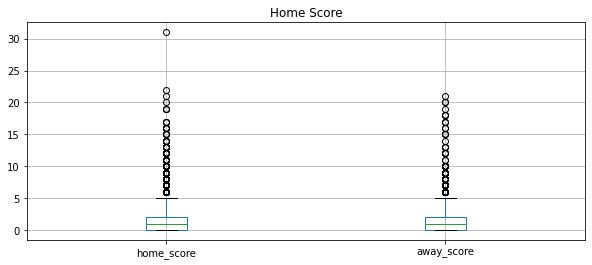

In [28]:
#checking outliers
plt.figure(figsize=(10, 4))
df.boxplot(['home_score', 'away_score'])
plt.title('Home Score')
plt.show()

> There are existing outliers but they won't be dropped as they are true values to the data,i.e, represent real time data.

### b) Tidying the FIFA Ranking dataset.

In [29]:
# drop the unnecessary columns
ranking_df.drop(['cur_year_avg', 'cur_year_avg_weighted',
       'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg',
       'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'country_abrv'], axis = 1, inplace=True)

In [30]:
# confirming the columns have been dropped
ranking_df.columns

Index(['rank', 'country_full', 'total_points', 'previous_points',
       'rank_change', 'rank_date'],
      dtype='object')

In [31]:
# Checking for duplicates
ranking_df.duplicated().value_counts()

False    13995
dtype: int64

In [32]:
# Dropping the duplicates
ranking_df.drop_duplicates(keep= False, inplace=True)

In [33]:
# Checking if the duplicates have been dropped
ranking_df.duplicated().any()

False

In [34]:
# Checking for null values
ranking_df.isnull().sum()

rank               0
country_full       1
total_points       1
previous_points    1
rank_change        1
rank_date          1
dtype: int64

In [35]:
# Dropping the null value
ranking_df.dropna(inplace=True)

In [36]:
# Reading our cleaned dataset
ranking_df.head()

,rank,country_full,total_points,previous_points,rank_change,rank_date
0,1,Germany,0.0,57.0,0.0,1993-08-08
1,2,Italy,0.0,57.0,0.0,1993-08-08
2,3,Switzerland,0.0,50.0,9.0,1993-08-08
3,4,Sweden,0.0,55.0,0.0,1993-08-08
4,5,Argentina,0.0,51.0,5.0,1993-08-08


In [37]:
# Split the date column into month and the year. 
# Because the rank_date is an object data type we have to change it to datetime

ranking_df.rank_date = ranking_df.rank_date.apply(lambda x: x.replace('/', '-'))

ranking_df.rank_date = pd.to_datetime(ranking_df.rank_date)

ranking_df['year'] = ranking_df.rank_date.dt.year

ranking_df['month'] = ranking_df.rank_date.dt.month

In [38]:
# Merging our datasets
fifa_df = pd.merge(ranking_df, df, how = 'inner', left_on = ['year', 'month', 'country_full'], right_on = ['year', 'month', 'home_team'])
fifa_df.head()

,rank,country_full,total_points,previous_points,rank_change,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,country,home_team_status
0,4,Sweden,0.0,55.0,0.0,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden,loss
1,4,Sweden,0.0,55.0,0.0,1993-08-08,1993,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Sweden,draw
2,5,Argentina,0.0,51.0,5.0,1993-08-08,1993,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,win
3,5,Argentina,0.0,51.0,5.0,1993-08-08,1993,8,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,draw
4,8,Brazil,0.0,55.0,-5.0,1993-08-08,1993,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,draw


In [39]:
# Rename rank column
fifa_df.rank = fifa_df.rename({'rank': 'home_rank'}, axis = 1, inplace = True)

In [40]:
# Dropping unnecessary columns
fifa_df.drop(['rank_date','date','country','total_points'], axis=1, inplace=True)

In [41]:
fifa_df.head()

,home_rank,country_full,previous_points,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,home_team_status
0,4,Sweden,55.0,0.0,1993,8,Sweden,Switzerland,1,2,Friendly,loss
1,4,Sweden,55.0,0.0,1993,8,Sweden,France,1,1,FIFA World Cup qualification,draw
2,5,Argentina,51.0,5.0,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,win
3,5,Argentina,51.0,5.0,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification,draw
4,8,Brazil,55.0,-5.0,1993,8,Brazil,Mexico,1,1,Friendly,draw


In [42]:
# Saving the fifa results cleaned dataset 
df.to_csv("newresults.csv", index=False)
# Reading the new dataset
df1 = pd.read_csv("newresults.csv")
df1

,date,home_team,away_team,home_score,away_score,tournament,country,year,month,home_team_status
0,1993-01-01,Ghana,Mali,1,1,Friendly,Gabon,1993,1,draw
1,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,1993,1,draw
2,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,1993,1,win
3,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,1993,1,win
4,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,1993,1,loss
...,...,...,...,...,...,...,...,...,...,...
23471,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Samoa,2019,7,win
23472,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Samoa,2019,7,draw
23473,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Egypt,2019,7,loss
23474,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,India,2019,7,loss


## 5. Exploratory Data Analysis.

### 5.1 Univariate Analysis.

#### 5.1.1 Numerical Variables

##### a) Measures of Central Tendancy

In [43]:
#using for loops to get the mean, mode and median for the home score column
numerical_columns=['home_score']
for column in numerical_columns:
  print('\n')
  print(column + ', Mean: ' + str(df1[column].mean()))
  print(column + ', Mode: ' + str(df1[column].mode()))
  print(column + ', Median: ' + str(df1[column].median()))




home_score, Mean: 1.650962685295621
home_score, Mode: 0    1
dtype: int64
home_score, Median: 1.0


In [44]:
#using for loops to get the mean, mode and median for the away score column
numerical_columns=['away_score']
for column in numerical_columns:
  print('\n')
  print(column + ', Mean: ' + str(df1[column].mean()))
  print(column + ', Mode: ' + str(df1[column].mode()))
  print(column + ', Median: ' + str(df1[column].median()))




away_score, Mean: 1.1001022320667917
away_score, Mode: 0    0
dtype: int64
away_score, Median: 1.0


##### b) Measures of Dispersion

In [45]:
numerical_columns=['home_score']
for column in numerical_columns:
  print('\n')
  print(column + ', Standard deviation: ' + str(df1[column].std()))
  print(column + ', Variance: ' + str(df1[column].var()))
  print(column + ', Skewness: ' + str(df1[column].skew()))
  print(column + ', Kurtosis: ' + str(df1[column].kurt()))
  print(column + ', Quartiles: ' + str(df1[column].quantile([0.25,0.5,0.75])))



home_score, Standard deviation: 1.704344986043338
home_score, Variance: 2.9047918314510657
home_score, Skewness: 2.430482308844992
home_score, Kurtosis: 14.245762974558048
home_score, Quartiles: 0.25    0.0
0.50    1.0
0.75    2.0
Name: home_score, dtype: float64


1. Positive value of skewness means the distribution is postively skewed,i.e, skewed to the right.(Mean> Mode)
2. Kurtosis value is higher than that of the normal distribution thus leptokurtic,i.e, it is heavy tailed and outliers are present.

In [46]:
numerical_columns=['away_score']
for column in numerical_columns:
  print('\n')
  print(column + ', Standard deviation: ' + str(df1[column].std()))
  print(column + ', Variance: ' + str(df1[column].var()))
  print(column + ', Skewness: ' + str(df1[column].skew()))
  print(column + ', Kurtosis: ' + str(df1[column].kurt()))
  print(column + ', Quartiles: ' + str(df1[column].quantile([0.25,0.5,0.75])))



away_score, Standard deviation: 1.3494251488541047
away_score, Variance: 1.8209482323599226
away_score, Skewness: 2.889931496146837
away_score, Kurtosis: 20.2756440676685
away_score, Quartiles: 0.25    0.0
0.50    1.0
0.75    2.0
Name: away_score, dtype: float64


1. Positive value means the distribution is postively skewed,i.e, skewed to the right.(Mean> Mode)
2. Kurtosis value is higher than that of the normal distribution thus leptokurtic,i.e, it is heavy tailed and outliers are present.

##### Bar Graphs

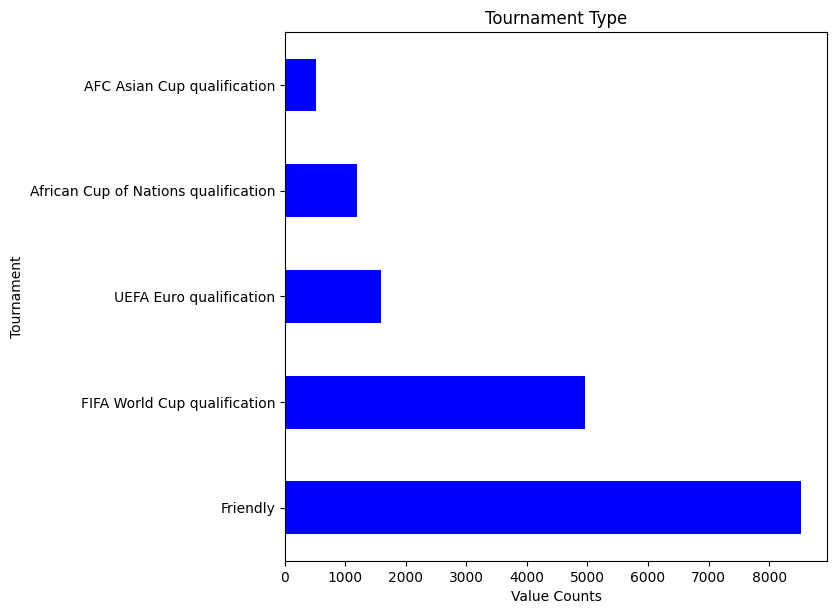

In [47]:
#creating a bar graph of the tournament type
#
plt.figure(figsize = (7,7), dpi = 100)
df1.tournament.value_counts().head()
df1.tournament.value_counts().head().plot(kind= 'barh',color='Blue')
plt.title('Tournament Type')
plt.xlabel('Value Counts')
plt.ylabel('Tournament')
plt.show()

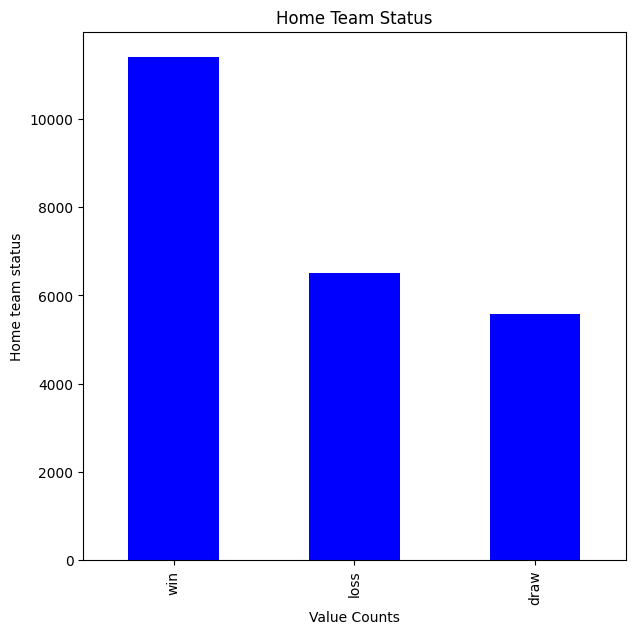

In [48]:
#creating a bar graph of the home team status
plt.figure(figsize = (7,7), dpi = 100)
df1.home_team_status.value_counts().head()
df1.home_team_status.value_counts().head().plot(kind= 'bar',color='Blue')
plt.title('Home Team Status')
plt.xlabel('Value Counts')
plt.ylabel('Home team status')
plt.show()

> Teams playing at home had more wins than losses or draws.

### 5.2 Bivariate Analysis.

#### 5.2.1 Numerical and Numerical

##### a) Scatter Plot

In [49]:
df1.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'year', 'month', 'home_team_status'],
      dtype='object')

In [50]:
fifa_df.columns

Index(['home_rank', 'country_full', 'previous_points', 'rank_change', 'year',
       'month', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'home_team_status'],
      dtype='object')

In [51]:
# First, we label encode the dataset so as to take into account the categorical data
#this label encoding will be needed for correlation and multivariate analysis
from sklearn.preprocessing import LabelEncoder
#encoding the object columns
columns = ['home_rank', 'country_full', 'previous_points',
       'rank_change', 'year', 'month', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'home_team_status']
#
# we convert the categorical variables 
#
df2= fifa_df[columns].apply(LabelEncoder().fit_transform)
#
# Print head
#
df2.head()

,home_rank,country_full,previous_points,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,home_team_status
0,3,155,55,21,0,7,155,183,1,2,19,1
1,3,155,55,21,0,7,155,69,1,1,18,0
2,4,7,51,26,0,7,7,148,2,1,18,2
3,4,7,51,26,0,7,7,147,0,0,18,0
4,7,25,55,16,0,7,25,122,1,1,19,0


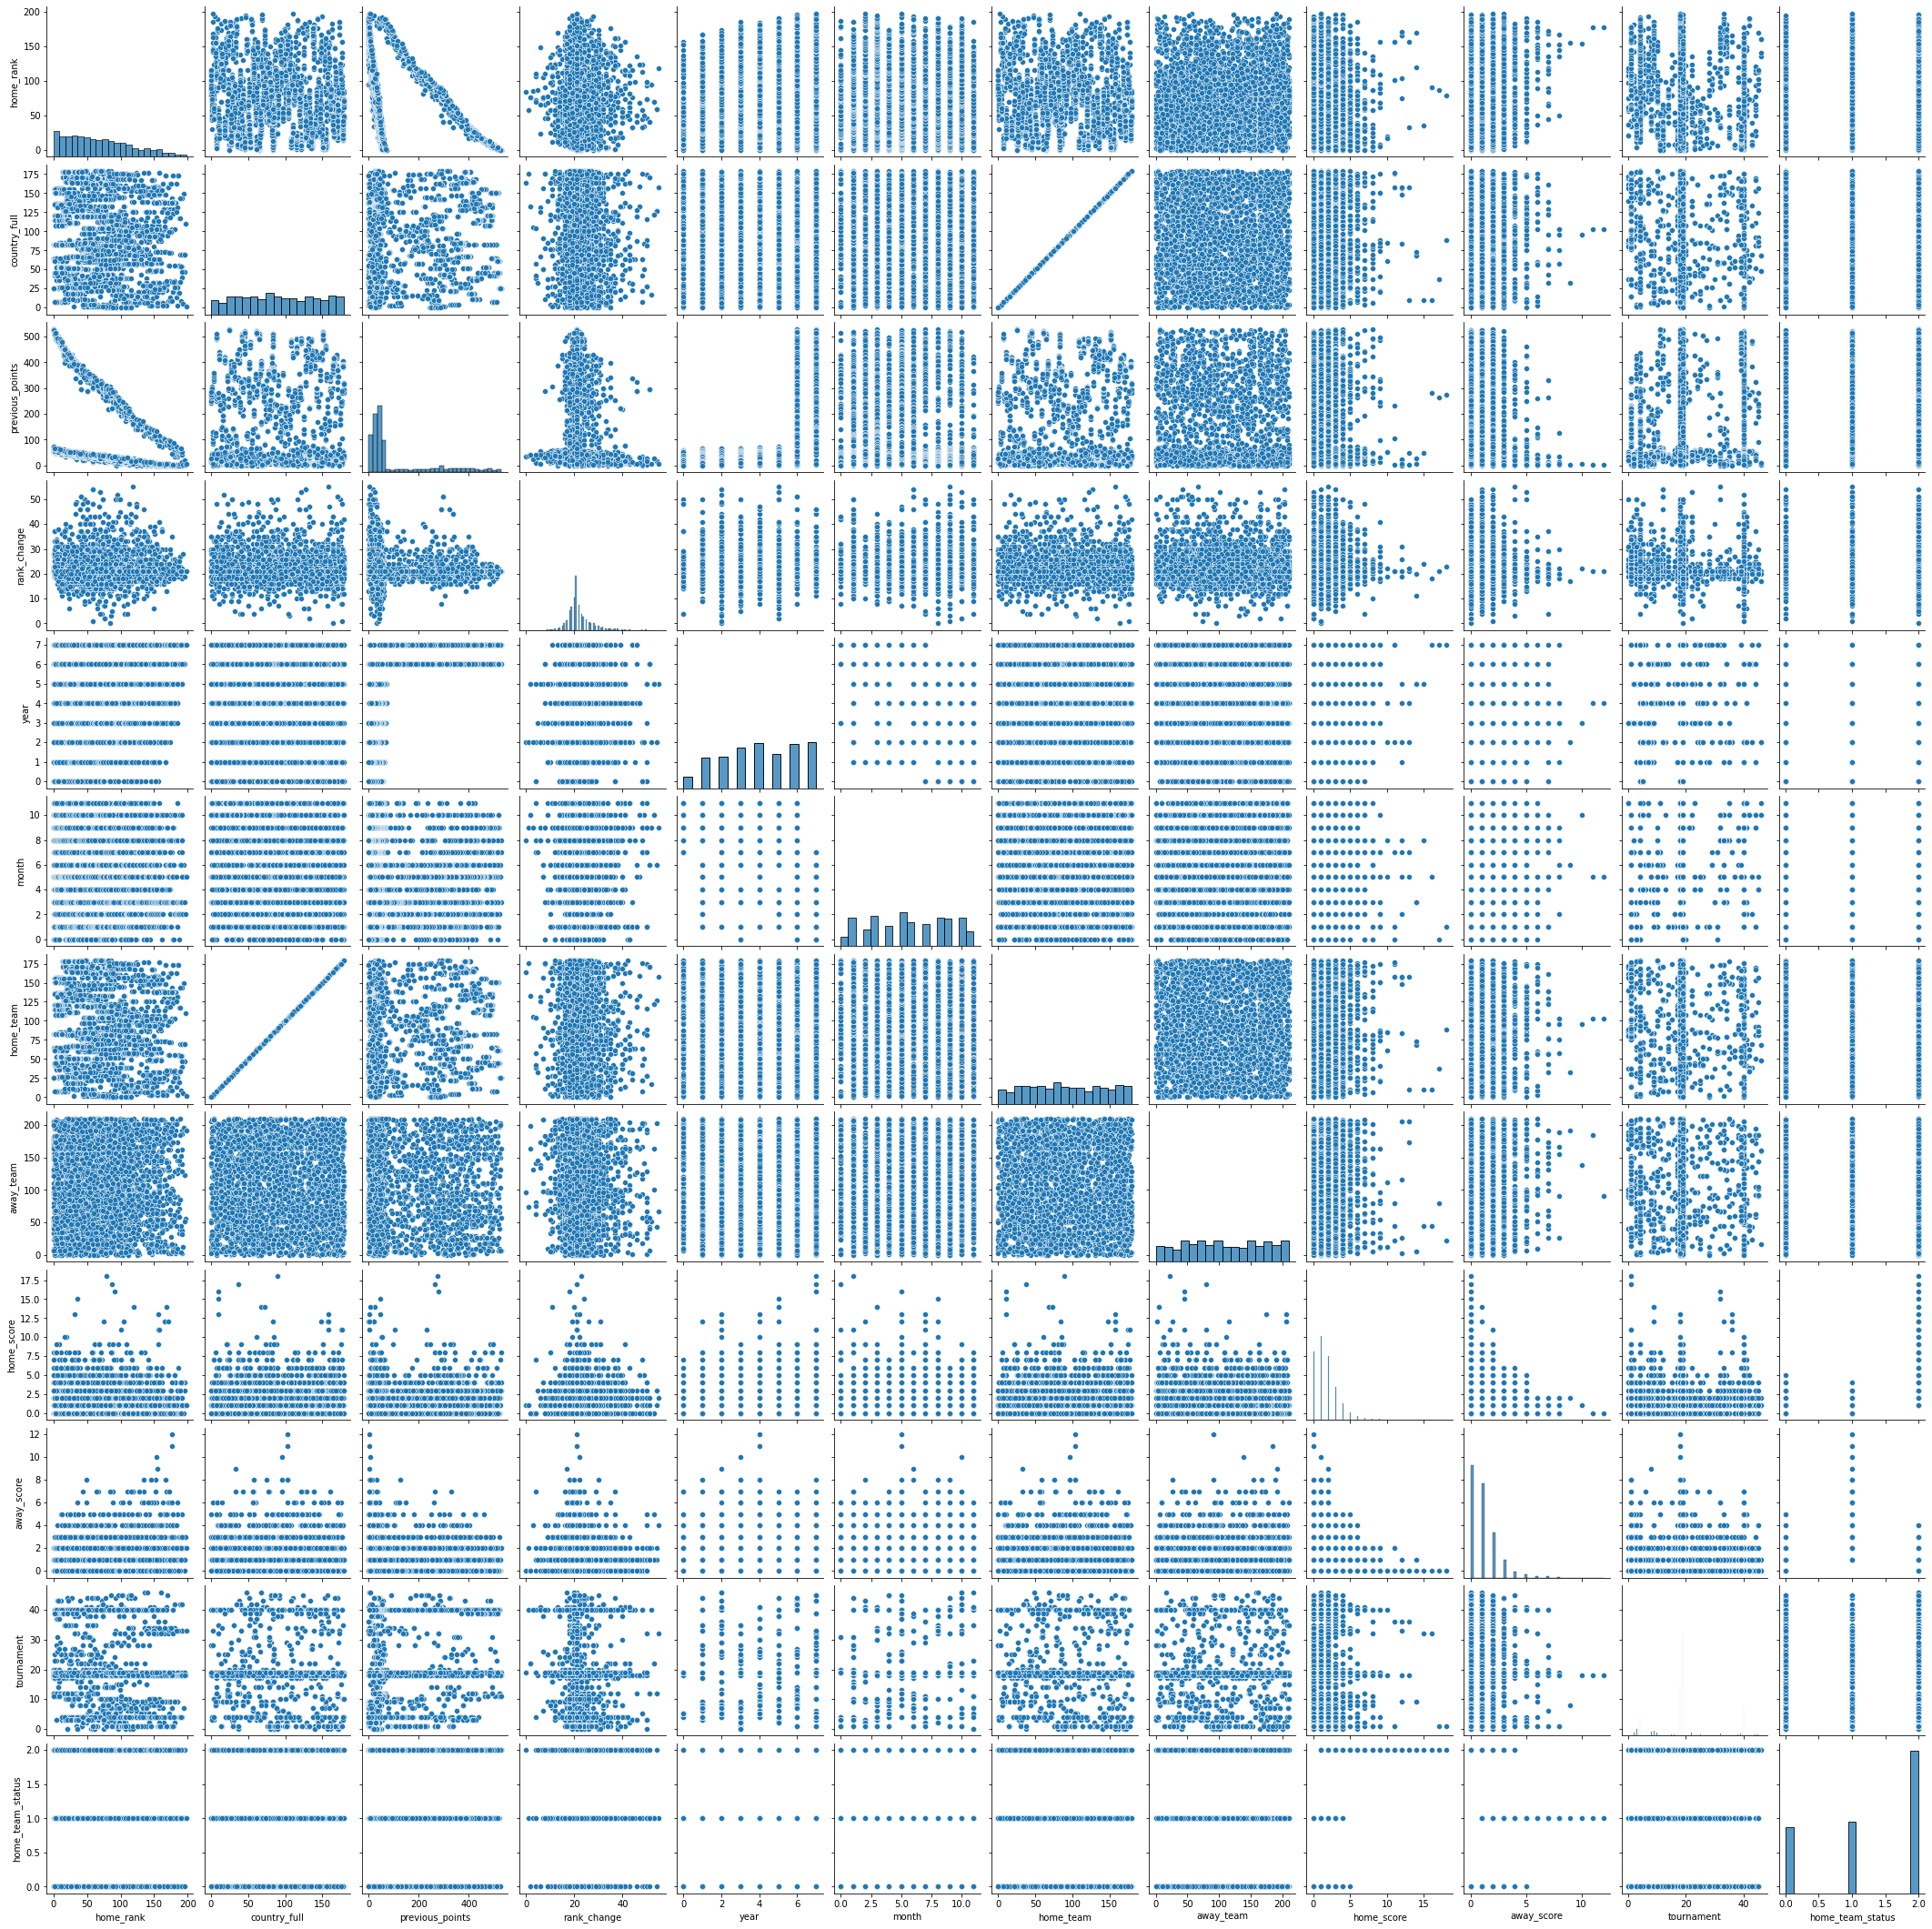

In [52]:
# Bivariate summaries 
sns.pairplot(df2);

##### b) Correlation

In [53]:
#this is a summary analysis of the correlation coefficients in the datasets

corr = df2.corr()

corr.style.background_gradient(cmap='coolwarm')

,home_rank,country_full,previous_points,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,home_team_status
home_rank,1.000000,-0.053222,-0.280346,0.004390,0.160551,-0.043307,-0.053222,0.020337,-0.092063,0.200907,-0.100428,-0.109353
country_full,-0.053222,1.000000,-0.006420,-0.026832,-0.042816,0.065815,1.000000,0.008864,0.014670,-0.010769,-0.039425,0.026206
previous_points,-0.280346,-0.006420,1.000000,-0.085632,0.675798,-0.204375,-0.006420,-0.044307,0.041826,-0.065973,0.112560,0.022143
rank_change,0.004390,-0.026832,-0.085632,1.000000,-0.051220,0.029053,-0.026832,-0.014832,0.065810,-0.058966,-0.071093,0.083808
year,0.160551,-0.042816,0.675798,-0.051220,1.000000,-0.325997,-0.042816,-0.041742,0.022420,-0.013998,-0.008596,-0.016371
month,-0.043307,0.065815,-0.204375,0.029053,-0.325997,1.000000,0.065815,0.040284,-0.000179,0.012376,0.156027,0.018263
home_team,-0.053222,1.000000,-0.006420,-0.026832,-0.042816,0.065815,1.000000,0.008864,0.014670,-0.010769,-0.039425,0.026206
away_team,0.020337,0.008864,-0.044307,-0.014832,-0.041742,0.040284,0.008864,1.000000,-0.043138,0.007571,0.004249,-0.013597
home_score,-0.092063,0.014670,0.041826,0.065810,0.022420,-0.000179,0.014670,-0.043138,1.000000,-0.142708,-0.028218,0.512565
away_score,0.200907,-0.010769,-0.065973,-0.058966,-0.013998,0.012376,-0.010769,0.007571,-0.142708,1.000000,0.034752,-0.231492


* Tournament has a low positive correlation with both home and team scores.
* Country has a high positive correlation with home team.
* Home_score has a high positive correlation with home team status.
* Previous points has a high positive correlation with year.

##### c) Bar Charts


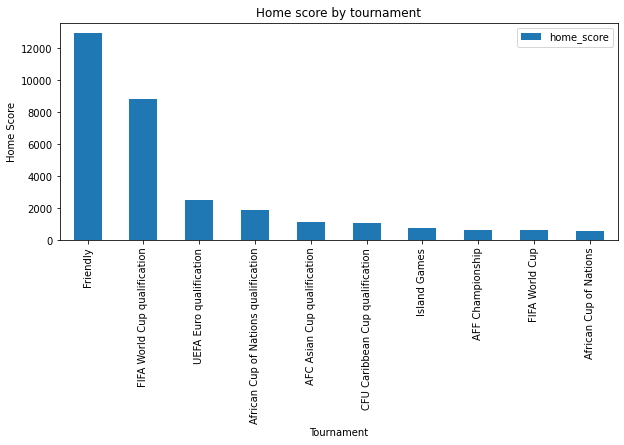

In [54]:
#checking home score by tournament 
plt.rcParams["figure.figsize"] = (10,4)
ax = df.groupby('tournament')['home_score'].sum().sort_values(ascending=False).head(10).to_frame().plot(kind = "bar", title = "Home score by tournament");
ax.set(xlabel='Tournament', ylabel='Home Score')
plt.show()

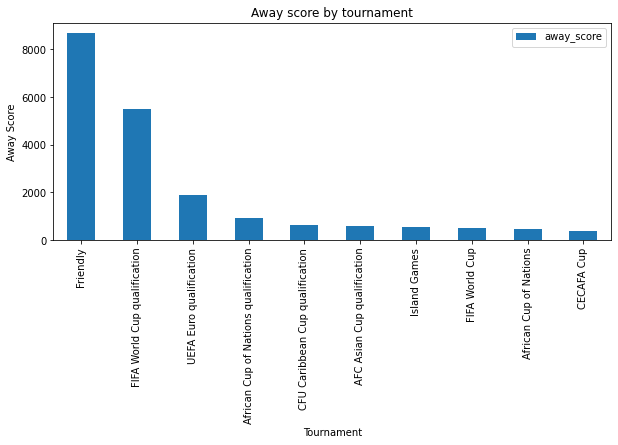

In [55]:
#checking away score by tournament 
plt.rcParams["figure.figsize"] = (10,4)
ax = df.groupby('tournament')['away_score'].sum().sort_values(ascending=False).head(10).to_frame().plot(kind = "bar", title = "Away score by tournament");
ax.set(xlabel='Tournament', ylabel='Away Score')
plt.show()

> Most of the matches played were friendlies between countries.

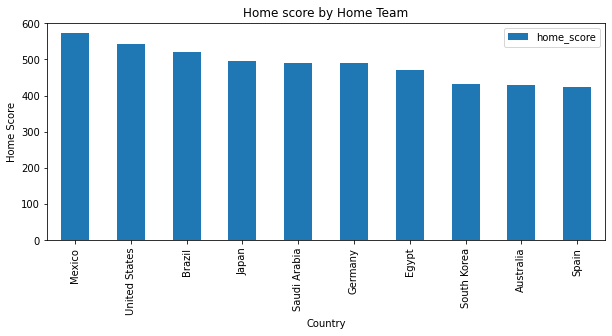

In [56]:
#checking home score by home_team 
plt.rcParams["figure.figsize"] = (10,4)
ax = df.groupby('home_team')['home_score'].sum().sort_values(ascending=False).head(10).to_frame().plot(kind = "bar", title = "Home score by Home Team");
ax.set(xlabel='Country', ylabel='Home Score')
plt.show()

> Brazil had that highest home score for a home team in the entirity of the results.

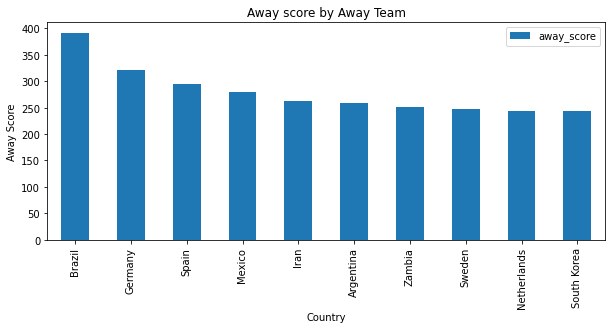

In [57]:
#checking away score by away_team
plt.rcParams["figure.figsize"] = (10,4)
ax = df.groupby('away_team')['away_score'].sum().sort_values(ascending=False).head(10).to_frame().plot(kind = "bar", title = "Away score by Away Team");
ax.set(xlabel='Country', ylabel='Away Score')
plt.show()

> England had that highest away score for an away team in the entirity of the results.

### 5.3 Multivariate Analysis.

#### LDA

In [58]:
# Divide the dataset into features and corresponding labels.
X = fifa_df.drop(["home_score"],axis=1)
y = fifa_df[['home_score']]

In [59]:
#import Linear Discriminant Analysismethod from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [60]:
#checking for unique values of the target variable
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       19, 20])

In [84]:
#create an instance of LDA and train the model
lda= LDA()

lda_= lda.fit(X, y)
lda_feat = lda_. transform(X)

#displaying the coefficients of the reducted columns
lda.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 3.99277123e-04, -2.70043287e-04, -1.68402728e-04,
        -1.20910106e-02,  2.94904129e-02,  8.81319673e-04,
        -2.70043287e-04, -2.71951730e-04, -4.53168848e-01,
        -7.65646052e-02, -1.59264913e-03],
       [ 4.96337680e-03, -3.53797356e-04,  4.21542720e-04,
        -2.14543133e-02, -3.03531682e-02, -4.68423133e-02,
        -3.53797356e-04, -2.50971711e-04, -1.00990675e+00,
         1.84955551e+00,  1.43185239e-02],
       [-2.68764128e-03,  3.04018147e-04, -1.34100902e-04,
         1.64416001e-02,  1.57398945e-03,  2.32008380e-02,
         3.04018147e-04,  2.53076770e-04,  7.19963866e-01,
        -8.96639543e-01, -6.47603919e-03]])

In [85]:
#coeeficients are in array thus we need a new dataframe to get the column names
feature_importance = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
feature_importance.sort_values(0, ascending= False)

,0
year,0.029490
month,0.000881
home_rank,0.000399
previous_points,-0.000168
country_full,-0.000270
home_team,-0.000270
away_team,-0.000272
tournament,-0.001593
rank_change,-0.012091
away_score,-0.076565


> The important features in our dataset are year, month and home_rank.

## 6. Building the Model.

### 6.1 Detecting Multicollinearity.

In [62]:
# Let's display the correlations between the variables
correlations = df2.corr()

correlations

,home_rank,country_full,previous_points,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,home_team_status
home_rank,1.000000,-0.053222,-0.280346,0.004390,0.160551,-0.043307,-0.053222,0.020337,-0.092063,0.200907,-0.100428,-0.109353
country_full,-0.053222,1.000000,-0.006420,-0.026832,-0.042816,0.065815,1.000000,0.008864,0.014670,-0.010769,-0.039425,0.026206
previous_points,-0.280346,-0.006420,1.000000,-0.085632,0.675798,-0.204375,-0.006420,-0.044307,0.041826,-0.065973,0.112560,0.022143
rank_change,0.004390,-0.026832,-0.085632,1.000000,-0.051220,0.029053,-0.026832,-0.014832,0.065810,-0.058966,-0.071093,0.083808
year,0.160551,-0.042816,0.675798,-0.051220,1.000000,-0.325997,-0.042816,-0.041742,0.022420,-0.013998,-0.008596,-0.016371
month,-0.043307,0.065815,-0.204375,0.029053,-0.325997,1.000000,0.065815,0.040284,-0.000179,0.012376,0.156027,0.018263
home_team,-0.053222,1.000000,-0.006420,-0.026832,-0.042816,0.065815,1.000000,0.008864,0.014670,-0.010769,-0.039425,0.026206
away_team,0.020337,0.008864,-0.044307,-0.014832,-0.041742,0.040284,0.008864,1.000000,-0.043138,0.007571,0.004249,-0.013597
home_score,-0.092063,0.014670,0.041826,0.065810,0.022420,-0.000179,0.014670,-0.043138,1.000000,-0.142708,-0.028218,0.512565
away_score,0.200907,-0.010769,-0.065973,-0.058966,-0.013998,0.012376,-0.010769,0.007571,-0.142708,1.000000,0.034752,-0.231492


In [64]:
# Computing the VIF score for each variable.
VIF = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
VIF

,home_rank,country_full,previous_points,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,home_team_status
home_rank,1.468225e+00,-5.156560e+15,9.146498e-01,5.466323e-01,-8.654433e-01,3.659977e-03,5.156560e+15,-2.229542e-02,5.303586e-02,-1.895965e-01,-1.216913e-02,3.842486e-02
country_full,-5.871530e+15,-1.489172e+33,-1.428236e+16,3.471077e+16,8.583105e+15,2.396511e+16,1.489172e+33,-7.179243e+14,-3.068433e+15,3.804252e+15,-4.232645e+15,1.135330e+15
previous_points,9.782103e-01,-1.562972e+16,2.484039e+00,4.686775e-01,-1.862232e+00,2.270369e-01,1.562972e+16,1.093974e-02,-1.735653e-02,-9.218463e-03,-2.407430e-01,4.272999e-03
rank_change,1.355731e-01,2.985935e+16,3.907431e-01,3.276621e-01,-1.994855e-01,-5.095866e-01,-2.985935e+16,3.081871e-02,3.074756e-02,-3.279445e-02,1.495623e-01,-8.221450e-02
year,-8.635926e-01,2.450804e+16,-1.717265e+00,-5.986383e-01,2.464934e+00,-1.165258e-03,-2.450804e+16,3.382424e-02,-1.293531e-02,2.691040e-02,1.487757e-01,1.197943e-02
month,2.395416e-01,7.172398e+16,6.633999e-01,-1.700861e+00,-2.015335e-02,2.671361e-03,-7.172398e+16,4.630811e-03,1.405455e-01,-1.855483e-01,1.999659e-02,-7.070282e-02
home_team,5.871530e+15,1.489172e+33,1.428236e+16,-3.471077e+16,-8.583105e+15,-2.396511e+16,-1.489172e+33,7.179243e+14,3.068433e+15,-3.804252e+15,4.232645e+15,-1.135330e+15
away_team,-2.539650e-02,-1.798399e+15,1.226672e-03,5.834210e-02,3.237439e-02,-1.005581e-03,1.798399e+15,1.004557e+00,4.220918e-02,7.284075e-03,-6.609271e-03,-1.060570e-02
home_score,7.246285e-02,2.585833e+15,3.964865e-02,-9.105007e-02,-7.833792e-02,-4.885497e-02,-2.585833e+15,4.716140e-02,1.371105e+00,1.415530e-02,3.241935e-02,-6.878461e-01
away_score,-2.220433e-01,1.742694e+15,-3.243244e-02,2.864434e-03,7.947453e-02,-3.036668e-02,-1.742694e+15,3.530015e-03,2.435190e-02,1.096963e+00,-4.120427e-02,2.159989e-01


> VIF's close to one indicate that there is minimal collinearity between variables thus no multicollinearity.

### 6.2 Approach 1: Polynomial Regression

#### a) Regression.

In [65]:
df2.columns

Index(['home_rank', 'country_full', 'previous_points', 'rank_change', 'year',
       'month', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'home_team_status'],
      dtype='object')

In [66]:
# defining our features
X = df2.drop(['country_full', 'previous_points', 'rank_change', 'year',
       'month', ],1).values
y = df2[['home_score']].values
# Reshaping the dataset
#X = X.reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [68]:
# Standardising the X_train and the X_test to the same scale
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
#Fitting the polynomial features to the X_train and X_test

poly_feat = PolynomialFeatures(degree = 2)
X_train = poly_feat.fit_transform(X_train)
X_test = poly_feat.fit_transform(X_test)

In [70]:
# Training the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [71]:
# Predict using Polynomial Regression

y_pred = regressor.predict(X_test)

> The low RMSE value indicates that the simulated and observed data are close to each other showing a good accuracy.

#### b) RMSE

In [72]:
# assess the accuraccy of the model
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score

print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error :  3.0645634996448517e-15


#### c) Cross Validation.

In [73]:
from sklearn.model_selection import KFold
import sklearn.metrics as metrics

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 5.1243803817576915e-15

Training model 2
Model 2 Root Mean Squared Error: 3.764403209346257e-15

Training model 3
Model 3 Root Mean Squared Error: 1.0858330276829506e-14

Training model 4
Model 4 Root Mean Squared Error: 4.486826008207228e-15

Training model 5
Model 5 Root Mean Squared Error: 9.173977311515647e-15


> The RMSE's we have found vary from the one we got earlier.

#### d) Create Residual Plots

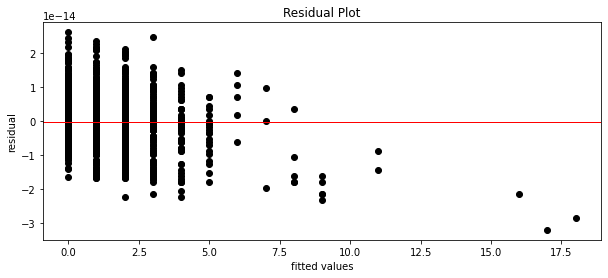

In [74]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

> Most he residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. This shows that the model is fairly good

#### e) Assess the heteroscedasticity of the plots using Bartlett’s test

In [89]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

ValueError: ignored

### 6.3 Approach 2: Logistic Regression.

#### a) Regression.

##### Home Team Status(Win, Loss or Draw)

In [77]:
# defining our features
X = df2.drop('home_team_status', axis=1)
y = df2[['home_team_status']]
# Reshaping the dataset
#X = X.reshape(-1,1)

In [78]:
# Splitting our dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=10)

In [79]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [80]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [81]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# The results from the confusion matrix tell us that 215, 289 and 599 are the number of correct predictions. 
# 28,43,40 and 25 are the number of incorrect predictions.

array([[215,  28,  43],
       [ 40, 289,   0],
       [ 25,   0, 599]])

> The results from the confusion matrix tell us that 215, 289 and 599 are the number of correct predictions. 
 28,43,40 and 25 are the number of incorrect predictions.

In [82]:
# Checking the accuracy of the model
score = LogReg.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.8902340597255851


> Our model has an accuracy of 0.890234

#### b) Cross-Validation.

In [83]:
# We use k-fold to do cross-validation on our logistic regression model 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

 


Accuracy: 0.880 (0.022)


> The cross validation shows that our model has an accuracy of 0.88.

## 7. Challenging the solution.
* In order to get a better understanding of the data, we'll need to use more models. This will give us an intuitive feel of the data.